In [1]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [2]:
ana_labels = {
    "Before" : [
        "preselection_CRY_onspill-LH_aw_bug",
        "preselection_signal_onspill-LH_aw_bug"
    ],
    
    "After" : [
        "preselection_CRY_onspill-LH_aw",
        "preselection_signal_onspill-LH_aw"
    ]
}

In [3]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw/results.pkl


In [4]:
plot = Plot() # just for style file

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [6]:
def plot_hists(hist_name, axis, data_configs, styles, **plot_settings):
    """Plot multiple histograms with settings unpacked from kwargs."""
    
    # Extract ylim_factor, default to 1.2 if not provided
    ylim_factor = plot_settings.pop("ylim_factor", 1.2)
    
    for config in data_configs:  # This loops through your data configurations
        hist_obj = results[config["reco"]][config["analysis"]]["hists"][hist_name]
        h_sel = hist_obj[{"selection": ["Preselect"]}]
        
        h_sel.plot1d(
            **styles[config["label"]],
            overlay="selection", 
            ax=axis, 
            label=config["label"], 
            flow="none"
        )
    
    axis.set_yscale("log")
    
    # Extend y-axis
    ylim = axis.get_ylim()
    axis.set_ylim(ylim[0], ylim[1] * ylim_factor)
    
    # Apply legend with remaining kwargs
    axis.legend(**plot_settings)

In [7]:
labels = labels = ["CRY (before)", "CRY (after)", "CeEndpoint (before)", "CeEndpoint (after)"]

# Data configuration
data_configs = [
    {"reco": "Before", "analysis": "preselection_CRY_onspill-LH_aw_bug", "label": labels[0]},
    {"reco": "After", "analysis": "preselection_CRY_onspill-LH_aw", "label": labels[1]},
    {"reco": "Before", "analysis": "preselection_signal_onspill-LH_aw_bug", "label": labels[2]},
    {"reco": "After", "analysis": "preselection_signal_onspill-LH_aw", "label": labels[3]}
]


styles = {
    "CRY (before)": {"color": "#C41E3A", "linewidth": 2},
     "CRY (after)": {"color": "#C41E3A", "histtype": "bar", "alpha": 0.4}, 
     "CeEndpoint (before)": {"color": "#228B22", "linewidth": 2}, 
     "CeEndpoint (after)": {"color": "#228B22", "histtype": "bar", "alpha": 0.4}
}

Wrote ../../output/images/comp/h1o_t0err.png


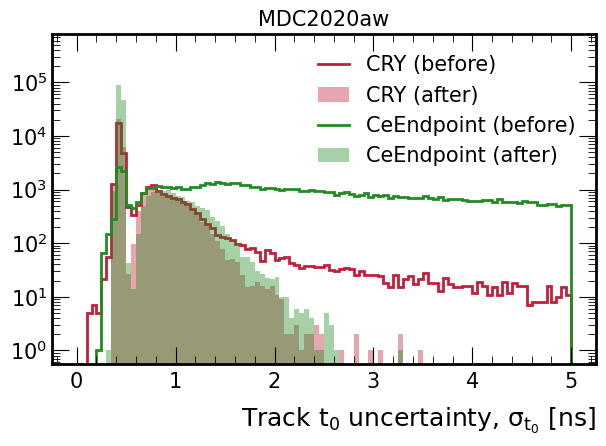

In [8]:
# Subplot styling 
subplot_configs = [
    {"hist": "t0err", "loc": "upper right", "ncol": 1, "ylim_factor": 5}
]

fig, ax = plt.subplots() 

# Get the configuration and extract the histogram name
subplot_config = subplot_configs[0].copy()  # Get first (and only) config
hist_name = subplot_config.pop("hist")  # Remove hist name from settings

plot_hists(
    hist_name, ax, data_configs, styles,  # Use the extracted hist_name
    **subplot_config  # Unpack the remaining settings (without 'hist')
)

ax.set_title("MDC2020aw")
plt.tight_layout()
out_path="../../output/images/comp/h1o_t0err.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

plt.show()

Wrote ../../output/images/comp/h1o_2x3_trk_aw_reproc.png


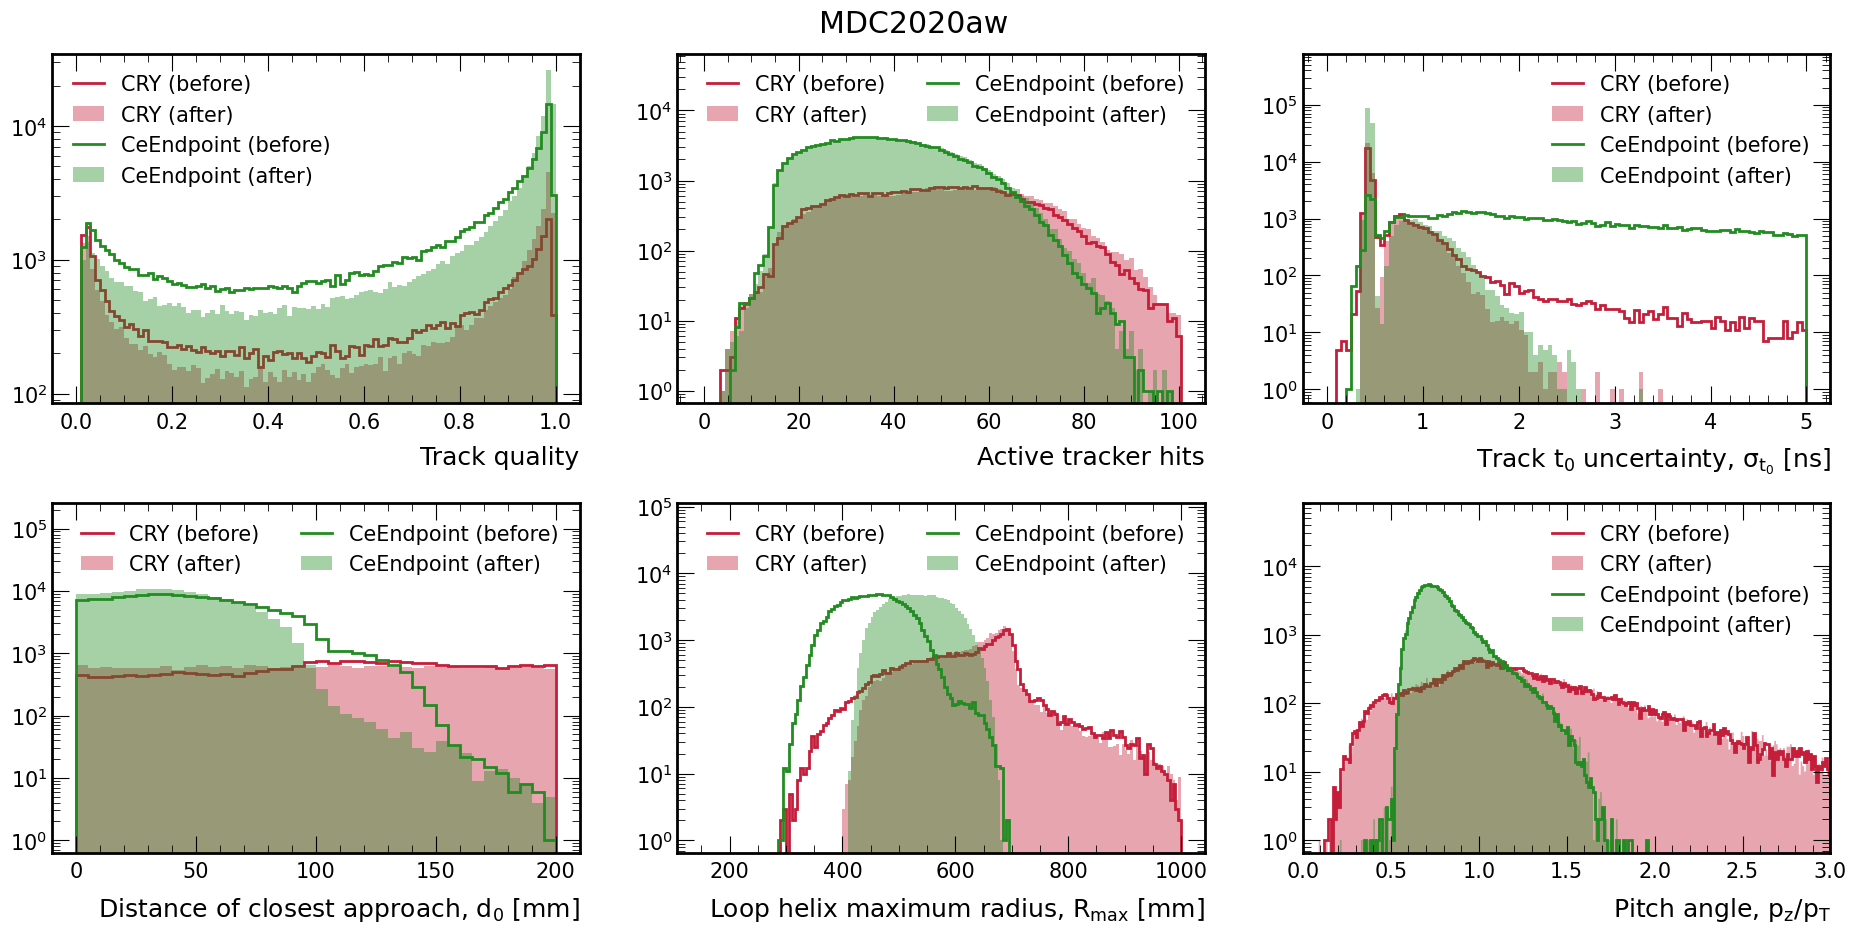

In [9]:
# Subplot styling 
subplot_configs = [
    # Row 0
    {"hist": "trkqual",    "loc": "upper left",  "ncol": 1, "ylim_factor": 1},
    {"hist": "nactive",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
    {"hist": "t0err",      "loc": "upper right", "ncol": 1, "ylim_factor": 5},
    # Row 1  
    {"hist": "d0",         "loc": "upper right",  "ncol": 2, "ylim_factor": 15},
    {"hist": "maxr",       "loc": "upper right", "ncol": 2, "ylim_factor": 15},
    {"hist": "pitch_angle","loc": "upper right",  "ncol": 1, "ylim_factor": 10}
]

fig, ax = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# Plot with both configurations
for subplot_config, axis in zip(subplot_configs, ax.flat):
    subplot_config_copy = subplot_config.copy()  # Don"t modify original
    hist_name = subplot_config_copy.pop("hist")

    # if hist_name == "t0err":
        
    #     print(axis)
    #     print(data_configs)
        
    plot_hists(
        hist_name, axis, data_configs, styles,  # Use data_configs here
        **subplot_config_copy
    )

# Details
ax[1,2].set_xlim(0, 3)

plt.suptitle("MDC2020aw")
# Add padding at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 1.02])

out_path="../../output/images/comp/h1o_2x3_trk_aw_reproc.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

# plt.tight_layout()
plt.show()

hist_name mom_full
hist_name mom_ext
hist_name mom_sig
Wrote ../../output/images/comp/h1o_1x3_mom_aw_reproc.png


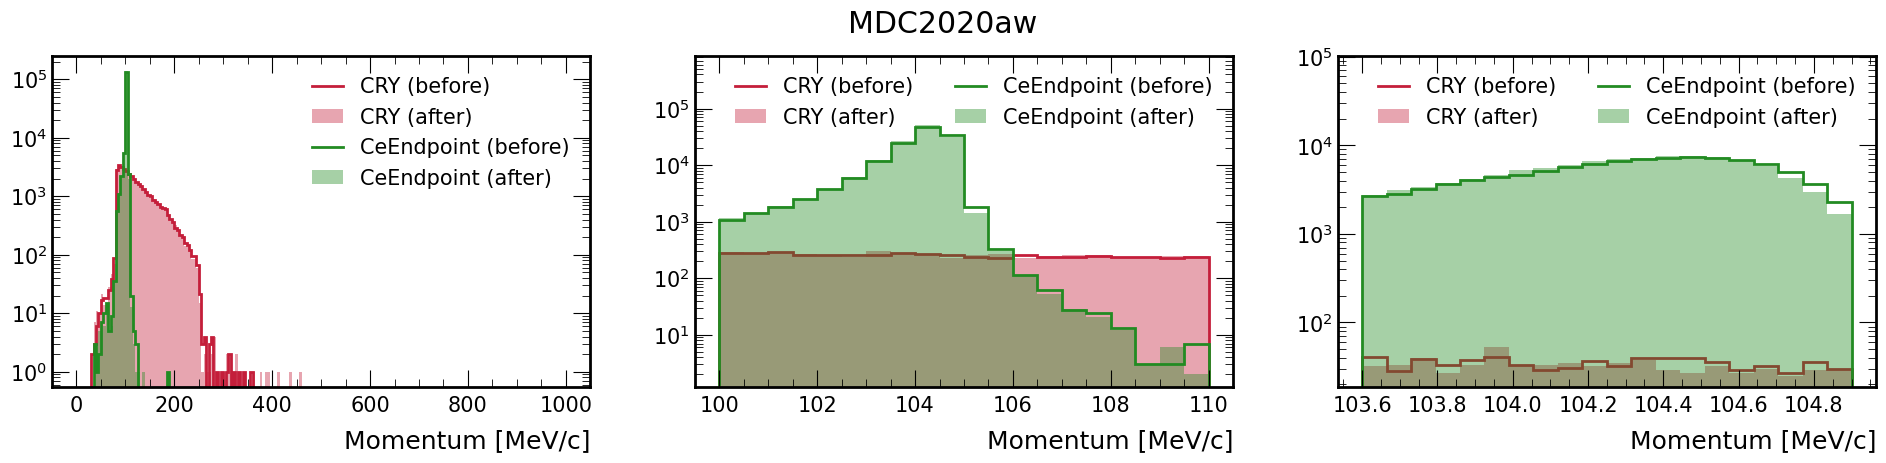

In [11]:
# Subplot styling 
subplot_configs = [
    {"hist": "mom_full",    "loc": "upper right",  "ncol": 1, "ylim_factor": 1},
    {"hist": "mom_ext",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
    {"hist": "mom_sig",      "loc": "upper right", "ncol": 2, "ylim_factor": 10}
]

fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8))

# Plot with both configurations
for subplot_config, axis in zip(subplot_configs, ax.flat):
    subplot_config_copy = subplot_config.copy()  # Don"t modify original
    hist_name = subplot_config_copy.pop("hist")
    print("hist_name", hist_name)
    
    plot_hists(
        hist_name, axis, data_configs, styles,  # Use data_configs here
        **subplot_config_copy
    )

plt.suptitle("MDC2020aw")
# Add padding at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 1.075])

out_path="../../output/images/comp/h1o_1x3_mom_aw_reproc.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

# plt.tight_layout()
plt.show()

In [16]:
events_before = results["Before"]["preselection_CRY_onspill-LH_aw_bug"]["events"]
events_after = results["After"]["preselection_CRY_onspill-LH_aw"]["events"]

In [23]:
# Select tracker entrance 
from pyutils.pyselect import Select
selector = Select()
at_trk_front_before = selector.select_surface(events_before["trkfit"], surface_name="TT_Front")
at_trk_front_after = selector.select_surface(events_after["trkfit"], surface_name="TT_Front")

events_before["trkfit"] = events_before["trkfit"][at_trk_front_before]
events_after["trkfit"] = events_after["trkfit"][at_trk_front_after]

from pyutils.pyprint import Print
printer = Print()

printer.print_n_events(events_before)
printer.print_n_events(events_after)

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 40758
evt.event: 236257
crv.crvcoincs.time: [550]
crv.crvcoincs.nHits: [26]
crv.crvcoincs.pos.fCoordinates.fZ: [-9.09e+03]
at_trk_front: [[False, False, False, True, False, False], ..., [False, False, ..., False]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, False, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, True]
good_trkqual: [False, False, False, False]
within_t0: [False, False, False, False]
has_hits: [True, True, True, True]
within_t0err: [True, True, True, True]
within_d0: [False, False, False, False]
pitch_angle: [

[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Analyse] ⭐️ Initialised with:
  on_spill        = False
  cut_config_path = /home/sgrant/mu2e-cosmic/src/core/../../config/common/cuts.yaml
  cutset_name     = alpha (baseline cutset with loop helix parameters)
  verbosity       = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyplot] ✅ Wrote:
	../../output/images/comp/h10_pitch_angle_aw.png


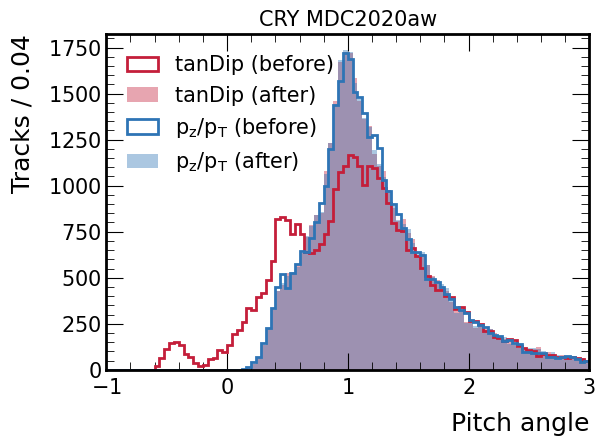

In [46]:
# Compare tanDip 
from analyse import Analyse 
analyse = Analyse()


# def get_pitch_angle(trkfit):
#         """Helper to calculate pitch angle"""
#         pvec = self.vector.get_vector(trkfit["trksegs"], "mom")
#         pt = np.sqrt(pvec["x"]**2 + pvec["y"]**2) 
#         pz = trkfit["trksegs"]["mom"]["fCoordinates"]["fZ"]
#         return pz/pt 

tanDip_before = events_before["trkfit"]["trksegpars_lh"]["tanDip"]
pitch_before = analyse.get_pitch_angle(events_before["trkfit"])

tanDip_after = events_after["trkfit"]["trksegpars_lh"]["tanDip"]
pitch_after = analyse.get_pitch_angle(events_after["trkfit"])


from pyutils.pyplot import Plot
plotter = Plot()

import awkward as ak

labels = ["tanDip (before)", r"$p_{z}/p_{T}$ (before)", "tanDip (after)", r"$p_{z}/p_{T}$ (after)"]
styles = {
    labels[0]: {"color": "#C41E3A", "linewidth": 2},
     labels[2]: {"color": "#C41E3A", "histtype": "bar", "alpha": 0.4}, 
     labels[1]: {"color": "#2E74B5", "linewidth": 2}, 
     labels[3]: {"color": "#2E74B5", "histtype": "bar", "alpha": 0.4}
}

plotter.plot_1D_overlay(
    hists_dict = {
        "tanDip (before)" : ak.flatten(tanDip_before, axis=None),
        "tanDip (after)" : ak.flatten(tanDip_after, axis=None),
        r"$p_{z}/p_{T}$ (before)": ak.flatten(pitch_before, axis=None),
        r"$p_{z}/p_{T}$ (after)": ak.flatten(pitch_after, axis=None)
    },
    nbins=100,
    xmin=-1.0,
    xmax=3.0,
    leg_pos="upper left",
    xlabel="Pitch angle",
    ylabel="Tracks / 0.04",
    title="CRY MDC2020aw",
    out_path="../../output/images/comp/h10_pitch_angle_aw.png",
    styles=styles
)
                